In [260]:
%pylab inline
rcParams['figure.figsize'] = [16, 3]
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [261]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

In [262]:
df = pd.read_csv('data/sample1.csv', parse_dates=True, index_col=0)
df

,Counter
Date,
2014-08-31 15:15:00,800
2014-08-31 15:30:00,685
2014-08-31 15:45:00,642
2014-08-31 16:00:00,637
2014-08-31 16:15:00,648
2014-08-31 16:30:00,802
2014-08-31 16:45:00,804
2014-08-31 17:00:00,814
2014-08-31 17:15:00,646


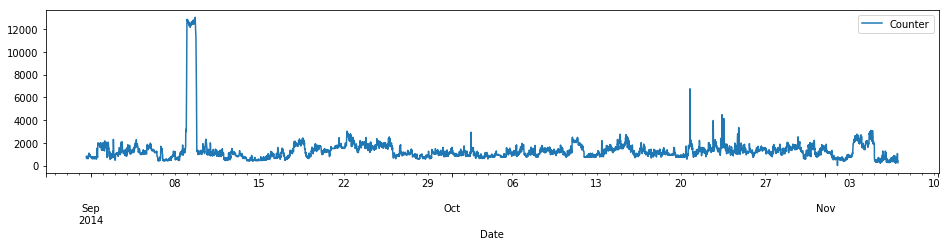

In [263]:
df.plot()

In [264]:
from datetime import timedelta
from datetime import datetime

In [283]:
exception_deviation = 500
exception_window_size = 100
compression_deviation = exception_deviation / 2
compression_window_size = 100

In [284]:
snapshot_time = df.index[0]
snapshot_value = data[0]

exception = []

exception_window_counter = 0

for index in range(len(data)):
    if index == 0:
        continue
    if abs(snapshot_value - data[index]) > exception_deviation:
        exception.append([df.index[index], data[index]])
        exception_window_counter = 0
    else:
        exception_window_counter = (exception_window_counter + 1) % exception_window_size
        
        if exception_window_counter == 0:
            exception.append([df.index[index], data[index]])
    
    if exception_window_counter == 0:
        snapshot_time = df.index[index]
        snapshot_value = data[index]
exception

[[Timestamp('2014-09-01 12:30:00'), 1536],
 [Timestamp('2014-09-01 13:00:00'), 853],
 [Timestamp('2014-09-01 14:00:00'), 1802],
 [Timestamp('2014-09-02 03:30:00'), 1287],
 [Timestamp('2014-09-02 03:45:00'), 2133],
 [Timestamp('2014-09-02 06:00:00'), 1583],
 [Timestamp('2014-09-02 08:30:00'), 831],
 [Timestamp('2014-09-02 09:15:00'), 1857],
 [Timestamp('2014-09-02 12:30:00'), 1226],
 [Timestamp('2014-09-02 15:00:00'), 538],
 [Timestamp('2014-09-02 15:30:00'), 1068],
 [Timestamp('2014-09-02 21:15:00'), 2305],
 [Timestamp('2014-09-02 21:45:00'), 1121],
 [Timestamp('2014-09-03 00:30:00'), 470],
 [Timestamp('2014-09-03 02:00:00'), 1057],
 [Timestamp('2014-09-03 09:15:00'), 1592],
 [Timestamp('2014-09-03 10:45:00'), 1029],
 [Timestamp('2014-09-03 12:15:00'), 1778],
 [Timestamp('2014-09-03 15:30:00'), 1224],
 [Timestamp('2014-09-04 02:15:00'), 1835],
 [Timestamp('2014-09-04 03:15:00'), 1323],
 [Timestamp('2014-09-04 16:30:00'), 1873],
 [Timestamp('2014-09-04 22:45:00'), 1276],
 [Timestamp('20

In [285]:
print("{} {}".format((len(data) - len(exception)), "number of data points discarded as part of exception window"))


6174 number of data points discarded as part of exception window


In [286]:
exception_df = pd.DataFrame(exception, columns=['Date', 'Counter'])
exception_df.set_index('Date', inplace=True)

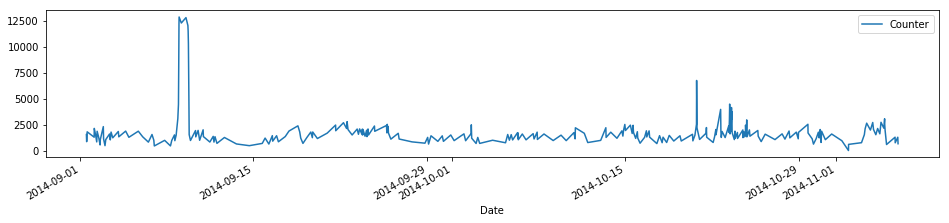

In [287]:
exception_df.plot()

In [288]:
snapshot_time = exception_df.index[0]
snapshot_value = exception_df['Counter'][0]

slope_max = +inf
slope_min = -inf

compression = []

compression_window_counter = 0

for index in range(len(exception_df['Counter'])):
    if index == 0:
        continue
    
    curr_slope = (exception_df['Counter'][index] - snapshot_value) / (exception_df.index[index] - snapshot_time).total_seconds();
    
    if curr_slope < slope_min or curr_slope > slope_max:
        compression.append([exception_df.index[index], exception_df['Counter'][index]])
        compression_window_counter = 0
    else:
        curr_slope_max = (exception_df['Counter'][index] + compression_deviation - snapshot_value) / (exception_df.index[index] - snapshot_time).total_seconds()
        curr_slope_min = (exception_df['Counter'][index] - compression_deviation - snapshot_value) / (exception_df.index[index] - snapshot_time).total_seconds()

        slope_max = min(slope_max, curr_slope_max)
        slope_min = max(slope_min, curr_slope_min)
        
        compression_window_counter = (compression_window_counter + 1) % compression_window_size

        if compression_window_counter == 0:
            compression.append([exception_df.index[index], exception_df['Counter'][index]])
            
    if compression_window_counter == 0:
        snapshot_time = exception_df.index[0]
        snapshot_value = exception_df['Counter'][0]

        slope_max = +inf
        slope_min = -inf
                
compression

[[Timestamp('2014-09-01 14:00:00'), 1802],
 [Timestamp('2014-09-02 03:45:00'), 2133],
 [Timestamp('2014-09-02 08:30:00'), 831],
 [Timestamp('2014-09-02 12:30:00'), 1226],
 [Timestamp('2014-09-02 15:30:00'), 1068],
 [Timestamp('2014-09-02 21:45:00'), 1121],
 [Timestamp('2014-09-03 02:00:00'), 1057],
 [Timestamp('2014-09-03 10:45:00'), 1029],
 [Timestamp('2014-09-03 15:30:00'), 1224],
 [Timestamp('2014-09-04 03:15:00'), 1323],
 [Timestamp('2014-09-04 22:45:00'), 1276],
 [Timestamp('2014-09-06 01:30:00'), 1323],
 [Timestamp('2014-09-06 19:30:00'), 1545],
 [Timestamp('2014-09-07 00:00:00'), 441],
 [Timestamp('2014-09-08 07:15:00'), 444],
 [Timestamp('2014-09-08 15:00:00'), 1506],
 [Timestamp('2014-09-08 18:15:00'), 1476],
 [Timestamp('2014-09-08 22:45:00'), 4451],
 [Timestamp('2014-09-08 23:15:00'), 8046],
 [Timestamp('2014-09-08 23:45:00'), 12238],
 [Timestamp('2014-09-09 04:15:00'), 12295],
 [Timestamp('2014-09-09 17:00:00'), 12054],
 [Timestamp('2014-09-09 18:00:00'), 10307],
 [Timestam

In [289]:
print("{} {}".format((len(exception) - len(compression)), "number of data points discarded as part of exception window"))


149 number of data points discarded as part of exception window


In [290]:
compression_df = pd.DataFrame(compression, columns=['Date', 'Counter'])
compression_df.set_index('Date', inplace=True)

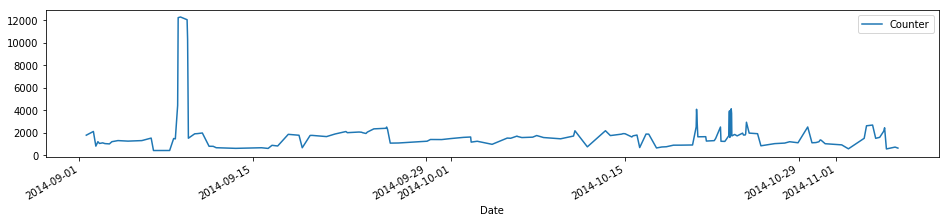

In [291]:
compression_df.plot()